In [34]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
# doc_utils.parse_doc(1,True)

In [36]:
# doc_utils.doc_db.sort_values(by='doc_idx_from_name')

In [37]:
imp.reload(doc_utils)
# doc_utils.save_docs_db()
doc_db =  pd.read_csv("./dataframes/doc_db.csv")
# doc_db.sort_values(by='doc_idx_from_name',inplace=True)
# doc_db.describe()
doc_db.sort_values(by='doc_idx_from_name')

,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count
0,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,01_aingimel3_lc.docx,1,205.000000,580.000000,256.000000
1,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,02_aingimel12_lc.docx,2,157.000000,632.000000,70.000000
2,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,03_aingimel26_lc.docx,3,118.000000,559.000000,102.000000
3,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,04_nun2_lc.docx,4,132.000000,460.000000,172.000000
4,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,05_kafhey_23_lc.docx,5,65.000000,510.000000,270.000000
...,...,...,...,...,...,...
75,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,76_nun2_Mor.docx,76,132.000000,464.000000,164.000000
76,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,77_nun25_Mor.docx,77,176.000000,406.000000,64.000000
77,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,78_tsadek27_Mor.docx,78,122.000000,178.000000,44.000000
78,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,79_tsadek29_Mor.docx,79,173.000000,252.000000,70.000000


In [47]:

def concat_dbs(db_name,cols=[]):
    df_list =  glob.glob(os.path.join(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"*_{}.csv".format(db_name))))
    df_list.sort()
    df_map = {}
    for df in df_list:
        df_map[feature_utils.get_doc_idx_from_name(df)] = df
    if len(cols) > 0:
        db = pd.concat([pd.read_csv(i,usecols=cols) for i in df_map.values()],keys=df_map.keys())
    else:
        db = pd.concat([pd.read_csv(i) for i in df_map.values()],keys=df_map.keys())
    db.reset_index(inplace=True)
    db.rename(columns={'level_0':'doc_idx','level_1':"{}_idx".format(db_name.split('_')[0])},inplace=True)
    return db

In [49]:
merged_db = concat_dbs("merged_db")
merged_db.head()

,doc_idx,merged_idx,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,TOKEN,POSTAG_ADVERB,POSTAG_AT,...,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_TTL,POSTAG_yyCM,POSTAG_NNPT
0,1,0,0.000000,0.000000,50.000000,1,0,10,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,1,0.000000,1.000000,9.000000,0,0,1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,1,2,0.000000,2.000000,18.000000,1,0,3,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,1,3,0.000000,3.000000,16.000000,0,0,2,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,1,4,0.000000,4.000000,8.000000,1,0,5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


<Figure size 1080x576 with 0 Axes>

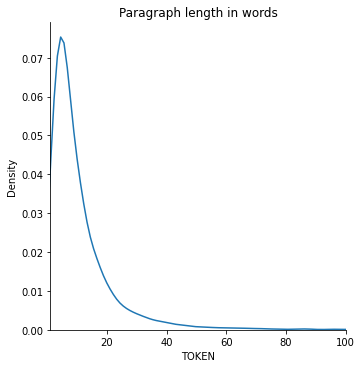

In [54]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

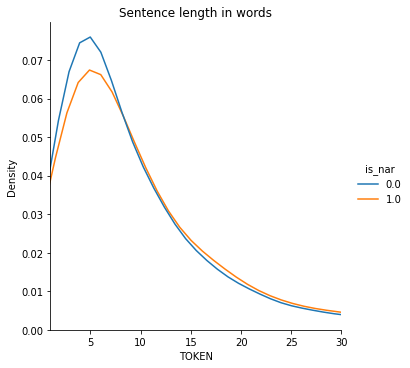

In [64]:
plt.figure(figsize = (8,15))
sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,30)))

In [39]:
imp.reload(feature_utils)
sent_db = concat_dbs("sent_db",['is_nar','nar_idx','sent_len','is_client','par_db_idx'])
sent_db

,doc_idx,sent_idx,is_nar,par_db_idx,nar_idx,sent_len,is_client
0,1,0,0.000000,0.000000,0.000000,47.000000,0
1,1,1,0.000000,1.000000,0.000000,2.000000,1
2,1,2,0.000000,2.000000,0.000000,15.000000,0
3,1,3,0.000000,3.000000,0.000000,8.000000,1
4,1,4,0.000000,4.000000,0.000000,19.000000,0
...,...,...,...,...,...,...,...
36319,80,486,0.000000,222.000000,0.000000,21.000000,1
36320,80,487,0.000000,222.000000,0.000000,27.000000,1
36321,80,488,0.000000,222.000000,0.000000,23.000000,1
36322,80,489,0.000000,223.000000,0.000000,19.000000,0


In [40]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [41]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36324 entries, 0 to 36323
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doc_idx     36324 non-null  int64  
 1   sent_idx    36324 non-null  int64  
 2   is_nar      36324 non-null  float64
 3   par_db_idx  36324 non-null  float64
 4   nar_idx     36324 non-null  float64
 5   sent_len    36324 non-null  float64
 6   is_client   36324 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.9 MB


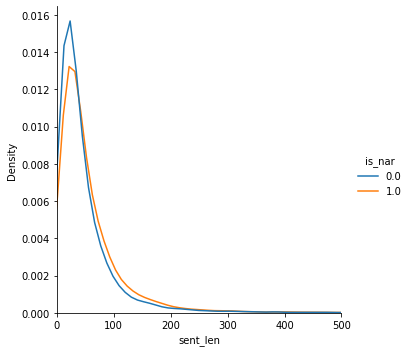

In [42]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

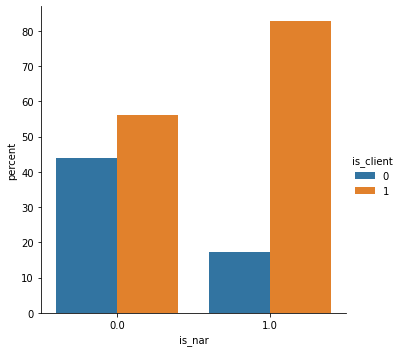

In [43]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [10]:
par_db = concat_dbs("par_db",['par_len','par_type','is_nar'])
par_db

,doc_idx,par_idx,par_len,par_type,is_nar
0,1,0,52.000000,client,0.000000
1,1,1,11.000000,therapist,0.000000
2,1,2,72.000000,client,0.000000
3,1,3,17.000000,therapist,0.000000
4,1,4,9.000000,client,0.000000
...,...,...,...,...,...
15063,80,80,608.000000,client,1.000000
15064,80,81,48.000000,therapist,0.000000
15065,80,82,11.000000,client,0.000000
15066,80,83,20.000000,therapist,0.000000


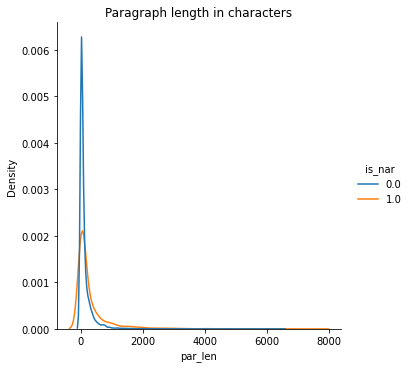

In [11]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [12]:
sent_db

,doc_idx,sent_idx,is_nar,par_db_idx,nar_idx,sent_len,is_client
0,1,0,0.000000,0.000000,0.000000,50.000000,1
1,1,1,0.000000,1.000000,0.000000,9.000000,0
2,1,2,0.000000,2.000000,0.000000,18.000000,1
3,1,3,0.000000,3.000000,0.000000,16.000000,0
4,1,4,0.000000,4.000000,0.000000,8.000000,1
...,...,...,...,...,...,...,...
36319,80,390,1.000000,80.000000,5.000000,28.000000,1
36320,80,391,0.000000,81.000000,0.000000,45.000000,0
36321,80,392,0.000000,82.000000,0.000000,9.000000,1
36322,80,393,0.000000,83.000000,0.000000,19.000000,0


In [13]:
par_len_count = sent_db.groupby(['doc_idx','par_db_idx'])['sent_idx'].count()
par_len_count

doc_idx  par_db_idx
1        0.000000       1
         1.000000       1
         2.000000       1
         3.000000       1
         4.000000       1
                       ..
80       80.000000     11
         81.000000      1
         82.000000      1
         83.000000      1
         84.000000      1
Name: sent_idx, Length: 14918, dtype: int64

In [14]:
par_len_count.describe()

count   14918.000000
mean        2.434911
std         3.717304
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       111.000000
Name: sent_idx, dtype: float64

In [15]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((57, 19.0), 111)

In [16]:
par_len_count.reset_index(drop=True).median()

1.0

In [17]:
par_len_count.quantile(q=0.95)

8.0

In [18]:
par_len_count.quantile(q=0.5)

1.0

In [19]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

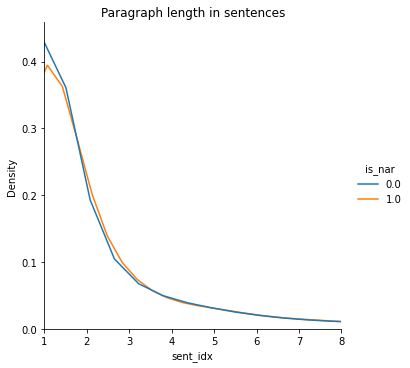

In [20]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

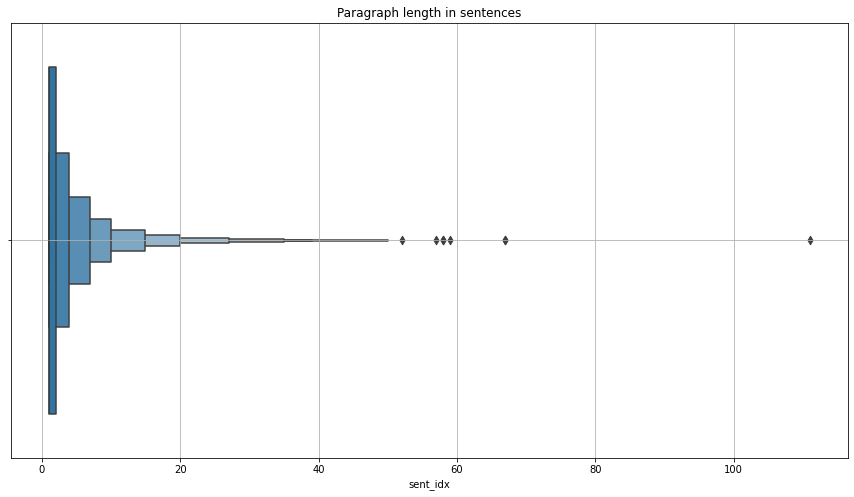

In [21]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")

In [176]:
i= 2
sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)))
curr_idx = doc_stat_db.shape[0]
doc_stat_db.loc[curr_idx,'dox_idx'] = i
doc_stat_db.loc[curr_idx,'sent_count'] = len(sent_db.index)
doc_stat_db.loc[curr_idx,'nar_count'] = sent_db['nar_idx'].nunique()
doc_stat_db.loc[curr_idx,'avr_sent_len_nar'] = sent_db.query('is_nar == 1')['sent_len'].mean()
doc_stat_db.loc[curr_idx,'avr_sent_len_not_nar'] = sent_db.query('is_nar == 0')['sent_len'].mean()
doc_stat_db.loc[curr_idx,'avr_nar_sent_count'] = sent_db.query('is_nar == 1').groupby('nar_idx').size().mean()
doc_stat_db.loc[curr_idx,'client_count'] = sent_db[sent_db['is_client'] == 1].shape[0]
doc_stat_db.loc[curr_idx,'therapist_count'] = sent_db[sent_db['is_client'] == 0].shape[0]
doc_stat_db.loc[curr_idx,'nar_client_count'] = sent_db[(sent_db['is_client'] == 1) & (sent_db['is_nar']==1)].shape[0]
doc_stat_db.loc[curr_idx,'nar_therapist_count'] = sent_db[(sent_db['is_client'] == 0) & (sent_db['is_nar']==1)].shape[0]
doc_stat_db.loc[curr_idx,'not_nar_client_count'] = sent_db[(sent_db['is_client'] == 1) & (sent_db['is_nar']==0)].shape[0]
doc_stat_db.loc[curr_idx,'not_nar_therapist_count'] = sent_db[(sent_db['is_client'] == 0) & (sent_db['is_nar']==0)].shape[0]



doc_stat_db

,dox_idx,sent_count,nar_count,avr_sent_len_nar,avr_sent_len_not_nar,avr_nar_sent_count,client_count,therapist_count,nar_client_count,nar_therapist_count,not_nar_client_count,not_nar_therapist_count
0,2.000000,632.000000,5.000000,37.285714,35.348754,17.500000,351.000000,281.000000,63.000000,7.000000,288.000000,274.000000


<Figure size 1080x576 with 0 Axes>

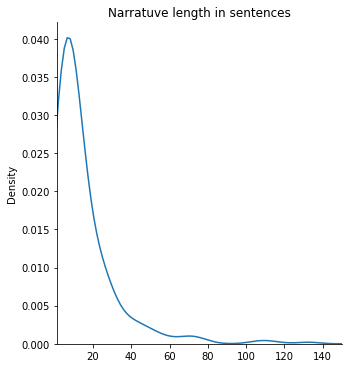

In [33]:
plt.figure(figsize = (15,8))
nar_len_count = sent_db.query("is_nar == 1").groupby(['doc_idx','nar_idx']).size()
nar_len_sent =  sns.displot(data=sent_db.query("is_nar == 1"),
                            x=nar_len_count.reset_index(drop=True),
                            kind='kde',
                            common_norm=False
                           )
nar_len_sent.set(title="Narratuve length in sentences",xlim=((1,150)))